<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,71.604641,69.879841,0.000120,151.484601,151.484443,0.000158
1,0.0,1.0,26.472582,52.742024,0.000563,89.215169,89.214867,0.000301
2,0.0,2.0,32.423102,34.100527,0.000588,76.524218,76.523905,0.000313
3,0.0,3.0,73.056382,48.066121,-0.000080,131.122423,131.122512,-0.000089
4,0.0,4.0,38.211705,58.795194,-0.000149,107.006750,107.007078,-0.000328
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,92.121075,96.472091,0.000084,198.593250,198.593206,0.000044
119996,999.0,116.0,48.717038,85.701692,-0.000075,144.418655,144.418679,-0.000024
119997,999.0,117.0,27.959569,58.853481,0.000363,96.813413,96.813043,0.000370
119998,999.0,118.0,52.881566,57.533420,0.000168,120.415154,120.415061,0.000093


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    71.604641  69.879841  0.000120  151.484601  151.484443  0.000158
      1.0    26.472582  52.742024  0.000563   89.215169   89.214867  0.000301
      2.0    32.423102  34.100527  0.000588   76.524218   76.523905  0.000313
      3.0    73.056382  48.066121 -0.000080  131.122423  131.122512 -0.000089
      4.0    38.211705  58.795194 -0.000149  107.006750  107.007078 -0.000328
...                ...        ...       ...         ...         ...       ...
999.0 115.0  92.121075  96.472091  0.000084  198.593250  198.593206  0.000044
      116.0  48.717038  85.701692 -0.000075  144.418655  144.418679 -0.000024
      117.0  27.959569  58.853481  0.000363   96.813413   96.813043  0.000370
      118.0  52.881566  57.533420  0.000168  120.415154  120.415061  0.000093
      119.0  72.216258  52.410303  0.000627  134.627188  134.626716  0.000472

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    71.604641  69.879841  0.000120  151.484601  151.484443  0.000158
      1.0    26.472582  52.742024  0.000563   89.215169   89.214867  0.000301
      2.0    32.423102  34.100527  0.000588   76.524218   76.523905  0.000313
      3.0    73.056382  48.066121 -0.000080  131.122423  131.122512 -0.000089
      4.0    38.211705  58.795194 -0.000149  107.006750  107.007078 -0.000328
...                ...        ...       ...         ...         ...       ...
999.0 115.0  92.121075  96.472091  0.000084  198.593250  198.593206  0.000044
      116.0  48.717038  85.701692 -0.000075  144.418655  144.418679 -0.000024
      117.0  27.959569  58.853481  0.000363   96.813413   96.813043  0.000370
      118.0  52.881566  57.533420  0.000168  120.415154  120.415061  0.000093
      119.0  72.216258  52.410303  0.000627  134.627188  134.626716  0.000472

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,71.604641,69.879841,0.000120,151.484601,151.484443,0.000158
1,0.0,1.0,26.472582,52.742024,0.000563,89.215169,89.214867,0.000301
2,0.0,2.0,32.423102,34.100527,0.000588,76.524218,76.523905,0.000313
3,0.0,3.0,73.056382,48.066121,-0.000080,131.122423,131.122512,-0.000089
4,0.0,4.0,38.211705,58.795194,-0.000149,107.006750,107.007078,-0.000328
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,92.121075,96.472091,0.000084,198.593250,198.593206,0.000044
119996,999.0,116.0,48.717038,85.701692,-0.000075,144.418655,144.418679,-0.000024
119997,999.0,117.0,27.959569,58.853481,0.000363,96.813413,96.813043,0.000370
119998,999.0,118.0,52.881566,57.533420,0.000168,120.415154,120.415061,0.000093


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    71.604641  69.879841  0.000120  151.484601  151.484443  0.000158
      1.0    26.472582  52.742024  0.000563   89.215169   89.214867  0.000301
      2.0    32.423102  34.100527  0.000588   76.524218   76.523905  0.000313
      3.0    73.056382  48.066121 -0.000080  131.122423  131.122512 -0.000089
      4.0    38.211705  58.795194 -0.000149  107.006750  107.007078 -0.000328
...                ...        ...       ...         ...         ...       ...
999.0 115.0  92.121075  96.472091  0.000084  198.593250  198.593206  0.000044
      116.0  48.717038  85.701692 -0.000075  144.418655  144.418679 -0.000024
      117.0  27.959569  58.853481  0.000363   96.813413   96.813043  0.000370
      118.0  52.881566  57.533420  0.000168  120.415154  120.415061  0.000093
      119.0  72.216258  52.410303  0.000627  134.627188  134.626716  0.000472

[120000 rows x 6 columns]

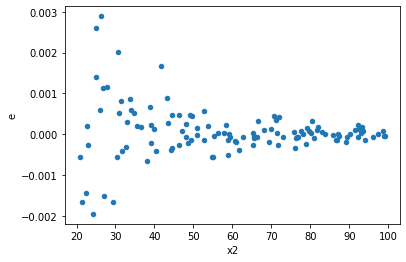

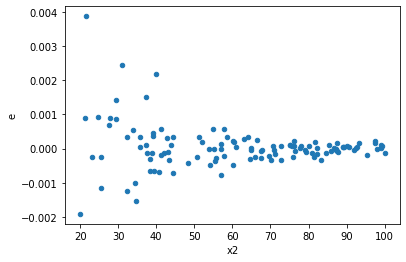

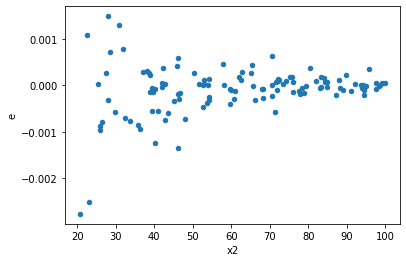

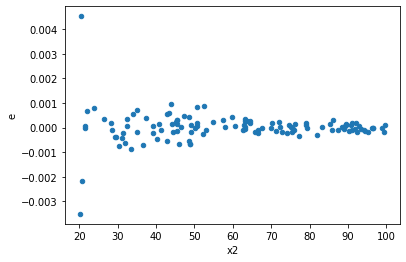

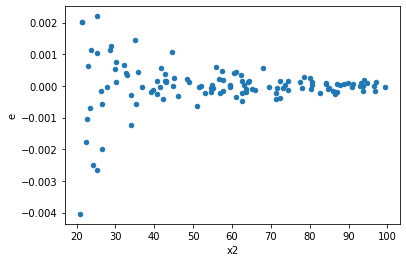

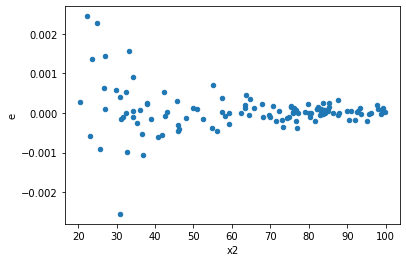

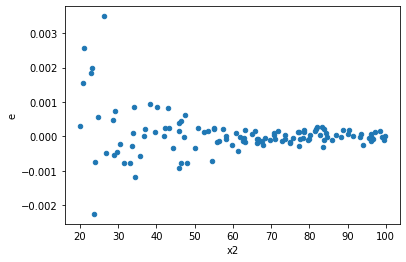

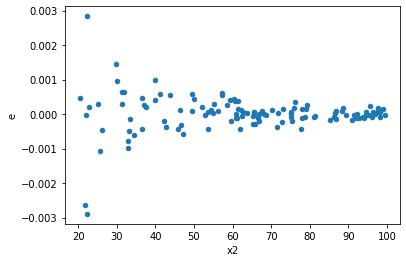

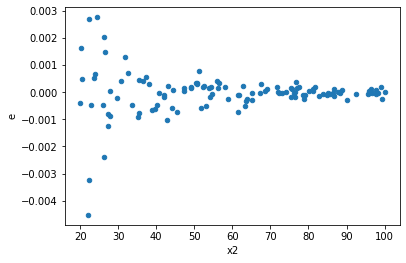

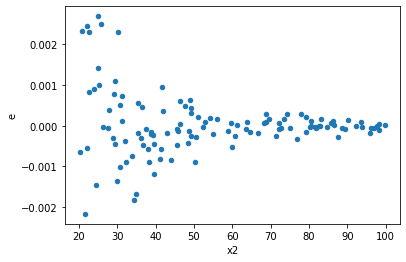

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,49.0,67.0,1.6966206323446283e-06,4.635835029197481e-05,3.462491086417609e-08,6.91915675999624e-07,19.98317565968089,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
4.0,65.0,51.0,1.0286894218985852e-05,5.7254146956318646e-05,1.582599110613208e-07,1.1226303324768361e-06,7.093586271774484,2.673505861139347e-11,0.9999999999866325,1.3367529305696735e-11,Reject001=0 : Heteroscedasticity
7.0,56.0,60.0,2.1009342639090137e-06,3.578039631502898e-05,3.751668328408953e-08,5.963399385838163e-07,15.89532672886141,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
8.0,50.0,66.0,2.299515350322125e-06,7.316987343467268e-05,4.5990307006442505e-08,1.1086344459798892e-06,24.105828339536576,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
9.0,54.0,62.0,5.705709026468608e-06,6.001600460054346e-05,1.0566127826793719e-07,9.68000074202314e-07,9.161351159765902,3.552713678800501e-15,0.9999999999999982,1.7763568394002505e-15,Reject001=0 : Heteroscedasticity
10.0,70.0,46.0,9.708726196804367e-06,3.520985070498367e-05,1.3869608852577666e-07,7.654315370648625e-07,5.518768014302055,1.1588725756794815e-08,0.9999999942056371,5.794362878397408e-09,Reject001=0 : Heteroscedasticity
11.0,50.0,66.0,4.139807578965596e-06,4.775069786011865e-05,8.279615157931192e-08,7.234954221230099e-07,8.738273558885894,4.440892098500626e-15,0.9999999999999978,2.220446049250313e-15,Reject001=0 : Heteroscedasticity
13.0,63.0,53.0,5.672660286427686e-06,6.736687149178243e-05,9.004222676869342e-08,1.2710730470147629e-06,14.116410628981685,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
14.0,54.0,62.0,2.961211897830457e-06,4.278624123324935e-05,5.483725736723069e-08,6.901006650524089e-07,12.584521877726056,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,59.0,57.0,3.7892682631239264e-05,6.801029262804092e-06,6.422488581565977e-07,1.1931630285621213e-07,0.1857789256312225,1.1793169168128542e-09,Reject001=0 : Heteroscedasticity
1.0,49.0,67.0,1.6966206323446283e-06,4.635835029197481e-05,3.462491086417609e-08,6.91915675999624e-07,19.98317565968089,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,68.0,48.0,2.8268886216106594e-05,4.191270779533935e-06,4.15718914942744e-07,8.731814124029031e-08,0.21004129978621838,5.917376328963903e-09,Reject001=0 : Heteroscedasticity
3.0,64.0,52.0,4.8611177279391334e-05,1.6549442487208098e-06,7.595496449904896e-07,3.182585093693865e-08,0.04190094899897839,7.366220370832027e-27,Reject001=0 : Heteroscedasticity
4.0,65.0,51.0,1.0286894218985852e-05,5.7254146956318646e-05,1.582599110613208e-07,1.1226303324768361e-06,7.093586271774484,2.673505861139347e-11,Reject001=0 : Heteroscedasticity
5.0,67.0,49.0,3.0218049632321284e-05,1.2447103101244391e-06,4.51015666154049e-07,2.540225122702937e-08,0.0563223256603086,9.819257080866676e-24,Reject001=0 : Heteroscedasticity
6.0,61.0,55.0,3.9818717359121667e-05,3.484183772268897e-06,6.527658583462568e-07,6.33487958594345e-08,0.09704673589995173,2.550739883028778e-16,Reject001=0 : Heteroscedasticity
7.0,56.0,60.0,2.1009342639090137e-06,3.578039631502898e-05,3.751668328408953e-08,5.963399385838163e-07,15.89532672886141,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,50.0,66.0,2.299515350322125e-06,7.316987343467268e-05,4.5990307006442505e-08,1.1086344459798892e-06,24.105828339536576,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    981
Reject001=1 : Homoscedasticity       19
Name: Result_test, dtype: int64